<a href="https://colab.research.google.com/github/Jungle-Sven/slopes_and_angles/blob/main/slopes_and_angles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sqlite3

In [18]:
class Database:
    def __init__(self):
        self.db_name = 'trades.db'
        self.db_folder = 'db'
        self.connect_to = self.db_address()



    def db_address(self):
        connect_to_db = 'sample_data' + os.sep + self.db_folder + os.sep + self.db_name
        print(connect_to_db)
        return connect_to_db

    def create_table_trades(self):
        conn = sqlite3.connect(self.connect_to)
        conn.execute('''CREATE TABLE if not exists Trades
                 (date FLOAT NOT NULL,
                  exchange TEXT NOT NULL,
                  side TEXT NOT NULL,
                  amount FLOAT NOT NULL,
                  price FLOAT NOT NULL
                  );''')
        conn.close()

    def add_data_trades(self, date, exchange, side, amount, price):
        conn = sqlite3.connect(self.connect_to)
        conn.execute("INSERT INTO Trades (date, exchange, side, amount, price) VALUES (?, ?, ?, ?, ?)", (date, exchange, side, amount, price));
        conn.commit()
        conn.close()

    def read_data_trades(self):
        conn = sqlite3.connect(self.connect_to)
        cursor = conn.execute("SELECT * FROM (SELECT * FROM Trades ORDER BY date DESC LIMIT 30000) ORDER BY date ASC;")
        result = cursor.fetchall()
        return result

# New Section

In [11]:
class ChaosTheoryExperiments:
    '''basic class with service funcs, reads data, plots graphs, etc '''
    def __init__(self):
        self.db = Database()

    def read_trades(self):
        data = self.db.read_data_trades()
        return data

    def create_df(self, data):
        df = pd.DataFrame(data, columns = ['date', 'exchange', 'side', 'amount', 'price'])
        return df

    def test_strat(self, df:pd.DataFrame, column:str, border:float = 0):
        '''a func to backtest signals
        diff_summ shows difference between buy and sell prices'''
        position = None
        inventory = 100
        entry_price = 0
        diff_summ = 0
        in_position = False
        n_trades = 0
        profit = 0
        for index, value in df.iterrows():
            if df.at[index, column] > border:
                if position == 'long':
                    pass
                else:
                    position = 'long'
                    diff = entry_price - df.at[index, 'price']
                    if in_position == True:
                        diff_summ += diff
                    entry_price = df.at[index, 'price']
                    #print('position is ', position, 'entry is ', entry_price, 'diff is ', diff)
                    in_position = True
                    n_trades += 1
            if df.at[index, column] < border:
                if position == 'short':
                    pass
                else:
                    position = 'short'
                    diff = df.at[index, 'price'] - entry_price
                    if in_position == True:
                        diff_summ += diff
                    entry_price = df.at[index, 'price']
                    #print('position is ', position, 'entry is ', entry_price, 'diff is ', diff)
                    in_position = True
                    n_trades += 1
        if n_trades != 0:
            profit = (diff_summ) / n_trades
        print('diff_summ', diff_summ, 'n_trades', n_trades, 'profit', profit)
        return df

    def remove_zeros_from_signal(self, df:pd.DataFrame, column:str, start_at_index:int):
        '''a func to mark all zero signals as previous signal '''
        for index, value in df.iterrows():
            if index > start_at_index and df.at[index, column] == 0:
                df.at[index, column] = df.at[index-1, column]
        return df

    def run(self):
        '''implement all actions here '''
        pass

In [12]:
class SlopesAndAngles(ChaosTheoryExperiments):
    '''best_fit_line - price as a straight line
    slope - уклон
    angle - угол наклона  '''
    def run(self):
        data = self.read_trades()
        df = self.create_df(data)

        '''represent price as a straight line '''
        best_fit_line = self.calc_best_fit_line(df)
        self.plot_best_fit_line(df.price, best_fit_line)

        '''calculate slopes and angles '''
        slope, angle = self.calc_slope_and_angle(df.price, range(len(df.price)))
        print ('slope: ' + str(slope))
        print ('angle: ' + str(angle))

    def calc_best_fit_line(self, df):
        '''transforms price to straight line '''
        x = df.price
        y = range(len(x))
        best_fit_line = np.poly1d(np.polyfit(y, x, 1))(y)
        return best_fit_line

    def plot_best_fit_line(self, x, best_fit_line):
        plt.figure(figsize=(8,6))
        plt.plot(x)
        plt.plot(best_fit_line, '--', color='r')
        plt.show()

    def calc_slope_and_angle(self, y:pd.Series, x:list):
        slope = (y.values[-1] - y.values[0]) / (x[-1] - x[0])
        angle = np.rad2deg(np.arctan2(y.values[-1] - y.values[0], x[-1] - x[0]))
        return slope, angle

sample_data/db/trades.db


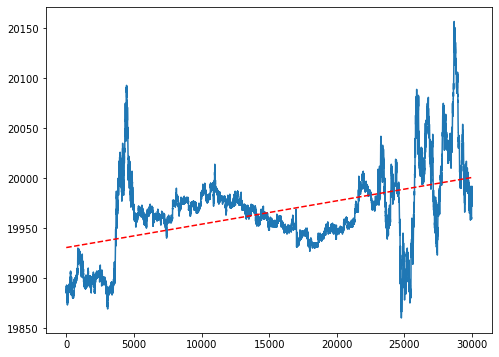

slope: 0.0029667655588519618
angle: 0.16998264661619214


In [19]:
zxc = SlopesAndAngles()
zxc.run()